### Activity lines of the K2 V471 Tau

- The emission at phase 0.5 is clearly varying in intensity over time. However, I cannot see a correlation between H$\alpha$ and Ca II H$\&$K variations.

- We can identify in H$\beta$ two emission lines (Ni 1 ???, Aluminium monoxide ???? **check**) that are located at -240 km/s ($\sim$ 485.7 nm) and 300 km/s ($\sim$~486.7 nm).

 2004 | 2005 | 2014
-|-|-
![](figs/dynha2004.png)    | ![](figs/dynha2005.png)    | ![](figs/dynha2014.png)   
![](figs/dynhb2004.png)    | ![](figs/dynhb2005.png)    | ![](figs/dynhb2014.png)
![](figs/dynCaHK2004.png)  | ![](figs/dynCaHK2005.png)  | ![](figs/dynCaHK2014.png)
![](figs/dynCaIRT2004.png) | ![](figs/dyncaIRT2005.png) | ![](figs/dynCaIRT2014.png)

Fig.1: Dynamical spectra of active lines, in the rest frame of the K2 dwarf, for observations in late 2004 (left), Dec 2005 (center), and Dec 2014 (right). The vertical dashed lines correspond to the stellar rotational broadening of $\pm v\sin(i)$. A sine wave of amplitude $215$~km/s is over-plotted on the 2004 and 2014 dynamical spectra of H$\alpha$. 



### Is there really an H$\alpha$ modulation in V471 Tau?

- Bois et al. (1991): decrease 1975 to 1983; grow in 1984;
- Rottler (2002): decrease 1985 and 1992 (almost zero emission)
- Kaminski et al. (2007): ~average value in Dec 2005 (they mention -0.5 angstrom at phase 0.5)
  - Kaminski et al. (2007) suggest a 9 yrs periodicity in the central emission (phase 0.5); 
      - **IF this periodicity exists, all ESPADONS observations so far are placed in the average emission.** Indeed we observe EQWs ~0.5 angstrom for the three years.
      - New observations in Dec 2020/ Jan 2021 would be placed for the first time in the _supposed_ maximum of H$\alpha$ cycle.

![](figs/Halpha_all.png)
Fig.2: Equivalent width of H$\alpha$ folded in phase for observations in late 2004 (red), Dec 2005 (blue), and Dec 2014 (black).

## Prominence

In [200]:
# flux in 2004


###############
# star params #
###############
# SI:

Rstar = 652533251. # meter
d = 1.472022e18    # meter
T = 5066           # Kelvins
# Prominence
l = 0.48*Rstar     # size
v = 4/3.*N.pi*l**3 # volume
EW_Ha = 0.30e-10   # Equivalent width  H alpha
EW_Hb = 0.09e-10   # Equivalent width  H beta
# cgs:
#ktc =12.276e-25 # transmition coeficient for prominence temp 2500 K
ktc =6.71e-25   # transmition coeficient for prominence temp 5000 K
#ktc =3.5588e-25  # transmition coeficient for prominence temp 10000 K
#
Mstar = 0.9971*1.989e33 # g
Mwd = 0.8778*1.989e33   # g
Dwd = 1.22*Rstar*1e2    # cm
Dstar = 2.36*Rstar*1e2  # cm
Dcm = (2.36-1.679)*Rstar*1e2  # cm
period = 0.521183398*24.*3600. # s
Omega = 2.*N.pi/period


#############
# constants #
#############
# SI:
l_Ha = 656.28e-9   # m
c = 299792458.     # m/s
h = 6.62607004e-34
Kb = 1.38064852e-23 
sigma = 5.670374419e-8
G = 6.67259e-12
# cgs:
hmass = 1.6735575e-24 # in g


#############
Ic = sigma*T**4*Rstar**2/d**2 ##total star
f_Ha = Ic*EW_Ha # flux in Halpha
#B_Ha = 2*h*c**2/l_Ha**5/(N.exp(h*c/(l_Ha*Kb*T))-1)
#Ic_Ha = EW_Ha*B_Ha
#print(B_Ha)
print('flux in erg/s/cm2 =', f_Ha*1.e7)
#############
#
NH = N.sqrt(3*(f_Ha*1.e7)*(d*1.e2)**2/(ktc*(l*1.e2)**3)) # cgs
print(r'N = %1.2f x 10^9' %(NH/1.e9)) # cgs
#
density = NH*hmass
mass = 4./3.*N.pi*density*(l*1.e2)**3 ## cgs
print('density = %1.2f x 10^-15 g/cm3' %(density/1.e-15))
print('mass = %1.2f x 10^17 g' %(mass/1.e17))
##############
grav = G*Mwd/Dwd**2 + G*Mstar/Dstar**2 + Omega**2*Dcm
print('gravity = %d cm/s2' %grav)
# Curvature radius (for now using the radius of the blob)
Rc = 0.3*Rstar*1e2 # cm  
B = N.sqrt(4*N.pi*Rc*density*grav)
print('B >= ', B)
Bsurf = B*Dstar**3/(Rstar*1e2)**3
print('Bsurf >= ', Bsurf)

flux in erg/s/cm2 = 2.2017622700988803e-15
N = 2.63 x 10^9
density = 4.41 x 10^-15 g/cm3
mass = 5.68 x 10^17 g
gravity = 867 cm/s2
B >=  0.9700737595877854
Bsurf >=  12.750897834904306


In [148]:
# Steengs 1996
NH = N.sqrt((1.472022e20/47.7*150)**2/1.82e-25/1e30*3*1e-13)
hmass = 1.6735575e-24 # in g
print(NH*hmass*1e30/1.e18)

0.9946098423644828


In [184]:
N.sqrt(4*N.pi*Rc*4.4e-15*867)

0.9687300455560784

### Rmax
> We can sustain structures up to the WD

In [194]:
r = N.linspace(1.68,5,60)*Rstar*1.e2 # cm
grav1 = G*Mwd/(3.58*Rstar*1.e2 - r)**2 + G*Mstar/(1.679*Rstar*1.e2 + r)**2 + Omega**2*(r-1.679*Rstar*1e2)
B = N.sqrt(4*N.pi*Rc*density*grav)
Breal = 90*(Rstar*1.e2/r)**3
ib = N.argmin(N.abs(1 - B/Breal))

Text(0.5,1,'r = 4.55 Rstar')

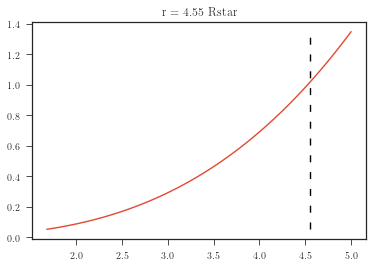

In [195]:
P.plot(r/(Rstar*1.e2), B/Breal)
P.plot(r[ib]/(Rstar*1.e2)*N.ones_like(r), B/Breal, 'k--', dashes=[5,7] )
P.title('r = %1.2f Rstar' %(r[ib]/(Rstar*1.e2)), fontsize='large')